In [ ]:
import os
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
from concurrent.futures import ProcessPoolExecutor
import matplotlib as plt


['S0083', 'S0089', 'S0106', 'S0107', 'S0110', 'S0111', 'W0087', 'S0173', 'S0177', 'S0179', 'S0188', 'S0199', 'S0206', 'S0208', 'S0209', 'S0216', 'S0225', 'S0227', 'S0229', 'S0230', 'S0233', 'S0238', 'S0245', 'S0249', 'S0250', 'S0260', 'S0261', 'S0268', 'S0284', 'S0291', 'S0299', 'S0301', 'S0309', 'S0314', 'S0324', 'S0337', 'S0338', 'S0339', 'S0341', 'S0349', 'S0351', 'S0353', 'S0372', 'S0376', 'S0387', 'S0392', 'S0407', 'S0410', 'S0429', 'S0430', 'S0439', 'S0451', 'S0456', 'S0462', 'S0463', 'S0482', 'S0483', 'S0495', 'S0509', 'S0516', 'S0517', 'S0545', 'S0548', 'S0562', 'S0568', 'S0569', 'S0573', 'S0576', 'S0579', 'S0586', 'S0587', 'W0001', 'W0002', 'W0003', 'W0004', 'W0005', 'W0006', 'W0008', 'W0009', 'W0010', 'W0011', 'W0013', 'W0014', 'W0016', 'W0017', 'W0018', 'W0019', 'W0023', 'W0024', 'W0026', 'W0029', 'W0031', 'W0035', 'W0037', 'W0039', 'W0040', 'W0043', 'W0044', 'W0046', 'W0047', 'W0048', 'W0049', 'W0050', 'W0051', 'W0052', 'W0056', 'W0057', 'W0058', 'W0059', 'W0060', 'W0061', 

In [ ]:


# Base directory (set to a location you have write access to)
base_directory = "C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning"

# Directory containing the CSV files
data_directory = os.path.join(base_directory, 'edp_data')

# Directory to save filtered data
filtered_data_directory = os.path.join(base_directory, 'filtered_data_real')

# Directory to save profiles
site_profiles_directory = os.path.join(base_directory, 'full_profiles_real')

resampled_data_directory = os.path.join(base_directory,'resampled_30min_data_real')

# Ensure these directories exist
for directory in [data_directory, filtered_data_directory, site_profiles_directory,resampled_data_directory]:
    if not os.path.exists(directory):
        os.makedirs(directory)
        


In [ ]:

# Find unique Site IDs for sites that have full 2023 data

# df = pd.read_csv('survey/edp_data_first_and_last_dates.csv')

# # Convert 'start date' and 'end date' columns to datetime
# df['date_of_first_data'] = pd.to_datetime(df['date_of_first_data'])
# df['date_of_last_data'] = pd.to_datetime(df['date_of_last_data'])

# # Define the date limits
# start_date_limit = pd.to_datetime('1/1/2023 00:00')
# end_date_limit = pd.to_datetime('12/31/2023 23:00')

# # Filter the rows where 'start date' is before 01/01/2023 and 'end date' is after 12/31/2023
# filtered_df = df[(df['date_of_first_data'] < start_date_limit) & (df['date_of_last_data'] > end_date_limit)]

# # Get the list of site_IDs
# site_ids = filtered_df['edp_site_id'].tolist()

# # Print the list of site_IDs
# print(site_ids)

# print(len(site_ids))


# # finding ids with ac_load_net data

# df = pd.read_csv('edp_data/edp_data_2023_01.csv')

# filtered_df = df[df['circuit_label'] == 'ac_load_net']

# unique_site_ids = filtered_df['edp_site_id'].unique()

# unique_site_ids_list = unique_site_ids.tolist()


# site IDs with data in 2023

site_ids_2023 = ['S0116', 'W0340', 'W0172', 'S0473', 'S0109', 'S0589', 'W0255', 'S0112', 'W0171', 'W0344', 'S0082', 'S0128',  'S0528', 'W0219', 'S0231', 'W0031', 'S0464', 'S0126', 'W0060', 'W0162', 'S0104', 'S0383', 'S0284', 'S0358', 'S0002', 'W0121', 'S0049', 'W0015', 'S0118', 'S0125', 'S0210', 'S0085', 'S0264', 'W0189', 'S0266', 'W0321', 'W0117', 'S0238', 'S0426', 'S0097', 'S0115', 'S0133', 'S0024', 'S0084', 'S0155', 'S0170', 'S0092', 'S0124', 'S0114', 'S0192', 'S0420', 'S0460', 'S0529', 'S0348', 'S0492', 'S0154', 'S0182', 'S0189', 'S0190', 'S0280', 'S0294', 'S0377', 'S0384', 'S0394', 'S0409', 'S0434', 'S0448', 'S0454', 'S0500', 'S0540', 'S0543', 'S0493', 'S0463', 'S0143', 'S0296', 'S0378', 'S0379', 'S0386', 'S0416', 'S0422', 'S0549', 'S0237', 'S0368', 'S0593', 'S0451', 'S0391', 'S0499', 'S0357', 'S0324', 'S0477', 'S0456', 'S0542', 'S0550', 'S0152', 'S0178', 'S0183', 'S0184', 'S0186', 'S0187', 'S0291', 'S0309', 'S0312', 'S0331', 'S0338', 'S0343', 'S0354', 'S0361', 'S0372', 'S0382', 'S0392', 'S0399', 'S0400', 'S0404', 'S0461', 'S0462', 'S0471', 'S0476', 'S0490', 'S0491', 'S0504', 'S0507', 'S0508', 'S0518', 'S0519', 'S0555', 'S0556', 'S0572', 'S0574', 'S0319', 'S0242', 'S0582', 'W0150', 'S0107', 'S0008', 'S0297', 'S0119', 'S0031', 'S0101', 'S0442', 'S0135', 'S0345', 'W0122', 'S0005', 'W0208', 'W0203', 'W0218', 'W0212', 'W0157', 'W0105', 'W0116', 'W0272', 'W0223', 'W0350', 'W0234', 'W0128', 'W0286', 'W0296', 'W0252', 'W0184', 'W0180', 'W0147', 'W0204', 'W0173', 'W0265', 'W0316', 'W0102', 'W0123', 'W0169', 'W0134', 'W0131', 'W0206', 'W0259', 'W0139', 'W0108', 'W0326', 'W0174', 'W0313', 'W0311', 'W0245', 'W0339', 'W0214', 'W0170', 'W0331', 'W0113', 'W0129', 'W0230', 'W0210', 'W0249', 'W0270', 'W0151', 'W0282', 'W0328', 'W0225', 'W0261', 'W0196', 'W0295', 'W0268', 'W0246', 'W0126', 'W0238', 'W0167', 'W0201', 'W0191', 'W0146', 'W0165', 'W0163', 'W0267', 'W0178', 'W0301', 'W0287', 'W0306', 'W0277', 'W0125', 'W0149', 'W0290', 'W0115', 'W0209', 'W0153', 'W0320', 'W0349', 'W0188', 'S0429', 'W0069', 'W0300', 'W0159', 'S0020', 'S0255', 'S0214', 'S0583', 'S0041', 'S0010', 'W0351', 'W0292', 'W0248', 'S0552', 'W0215', 'W0289', 'W0337', 'W0322', 'S0288', 'W0056', 'W0072', 'S0515', 'S0260', 'S0287', 'W0308', 'W0103', 'W0257', 'W0101', 'W0327', 'W0353', 'W0288', 'W0185', 'W0222', 'W0317', 'W0227', 'W0043', 'W0156', 'W0352', 'S0252', 'W0194', 'W0247', 'W0109', 'W0062', 'W0078', 'W0166', 'S0151', 'S0140', 'W0226', 'W0217', 'W0112', 'W0104', 'W0251', 'W0152', 'W0145', 'W0213', 'S0495', 'W0143', 'W0312', 'W0135', 'W0323', 'W0279', 'S0233', 'W0019', 'W0161', 'S0117', 'S0088', 'W0341', 'W0211', 'W0276', 'W0012', 'S0547', 'W0281', 'W0187', 'W0347', 'W0241', 'W0304', 'S0181', 'W0269', 'W0283', 'S0480', 'W0138', 'S0584', 'S0253', 'W0220', 'W0127', 'W0275', 'W0010', 'W0228', 'S0441', 'W0106', 'W0274', 'S0497', 'W0229', 'S0163', 'W0224', 'W0200', 'S0402', 'S0355', 'W0233', 'W0333', 'W0164', 'W0091', 'W0093', 'S0445', 'W0236', 'S0521', 'S0527', 'W0307', 'W0148', 'S0523', 'W0330', 'W0130', 'S0240', 'W0216', 'W0017', 'W0303', 'S0398', 'S0245', 'S0469', 'W0192', 'W0314', 'W0193', 'S0328', 'W0049', 'S0457', 'W0158', 'W0098', 'S0424', 'W0293', 'W0298', 'W0284', 'W0325', 'W0318', 'W0235', 'W0299', 'S0468', 'S0194', 'W0028', 'W0029', 'S0235', 'W0137', 'S0506', 'W0110', 'W0038', 'W0346', 'W0244', 'W0329', 'W0342', 'W0240', 'W0205', 'W0343', 'W0111', 'W0278', 'W0264', 'W0168', 'W0271', 'S0176', 'W0140', 'W0334', 'S0405', 'S0225', 'W0133', 'W0345', 'W0095', 'S0172', 'W0088', 'S0557', 'W0119', 'S0522', 'W0280', 'W0195', 'S0323', 'S0539', 'W0237', 'S0514', 'W0263', 'W0202', 'W0089', 'W0076', 'W0061', 'S0321', 'W0182', 'S0149', 'W0097', 'S0494', 'S0431', 'S0538', 'W0154', 'W0198', 'W0315', 'S0305', 'W0120', 'W0179', 'W0066', 'S0221', 'W0087', 'S0254', 'W0070', 'S0393', 'S0262', 'S0206', 'S0269', 'S0450', 'S0600', 'S0443', 'W0190', 'W0181', 'S0256', 'S0487', 'S0410', 'W0094', 'W0294', 'W0310', 'W0338', 'S0428', 'S0578', 'W0221', 'W0186', 'S0415', 'W0266', 'W0348', 'W0175', 'W0001', 'S0274', 'W0302', 'W0124', 'S0333', 'S0599', 'S0335', 'W0177', 'W0063', 'W0114', 'W0335', 'W0297', 'W0260', 'W0155', 'W0319', 'W0254', 'W0022', 'S0385', 'S0282', 'S0224', 'W0118', 'S0168', 'S0411', 'S0166', 'W0160', 'W0336', 'W0273', 'W0044', 'W0231', 'W0332', 'W0258', 'S0169', 'W0243', 'S0165', 'W0183', 'S0167', 'W0253', 'W0037', 'W0142', 'S0339', 'W0199', 'W0250', 'W0291', 'S0511', 'W0024', 'W0324', 'S0301', 'W0081', 'W0005', 'S0389', 'S0446', 'S0512', 'W0207', 'W0232', 'W0107', 'S0337', 'S0203', 'S0444', 'W0032', 'S0139', 'S0483', 'W0047', 'W0018', 'S0567', 'S0363', 'W0074', 'S0374', 'S0509', 'S0559', 'W0096', 'W0002', 'W0026', 'W0059', 'W0006', 'W0040', 'W0046', 'W0144', 'W0039', 'W0004', 'W0016', 'W0071', 'W0073', 'W0079', 'W0011', 'W0085', 'W0048', 'W0050', 'W0197', 'W0054', 'S0525', 'W0014', 'W0009', 'S0532', 'S0211', 'S0536', 'W0084', 'W0075', 'S0364', 'S0193', 'W0052', 'S0470', 'W0030', 'W0008', 'W0027', 'W0057', 'W0065', 'S0430', 'W0042', 'W0141', 'W0058', 'W0068', 'W0013', 'W0023', 'W0021', 'S0142', 'S0281', 'S0524', 'W0035', 'W0003', 'S0356', 'S0159', 'S0591', 'S0090', 'S0535', 'S0365', 'S0342', 'S0381', 'S0277', 'S0303', 'S0570', 'S0136', 'S0452', 'S0418', 'S0318', 'S0482', 'S0322', 'S0414', 'S0432', 'S0566', 'S0594', 'S0144', 'S0437', 'S0226', 'S0232', 'S0467', 'S0120', 'S0272', 'S0427', 'S0270', 'S0433', 'S0247', 'S0558', 'S0375', 'S0106', 'S0390', 'S0130', 'S0250', 'S0587', 'S0544', 'S0208', 'S0099', 'S0340', 'S0387', 'S0304', 'S0475', 'S0249', 'S0325', 'S0553', 'S0353', 'S0197', 'S0267', 'S0478', 'S0580', 'S0412', 'S0275', 'S0541', 'S0286', 'S0562', 'S0188', 'S0259', 'S0407', 'S0359', 'S0147', 'S0513', 'S0408', 'S0395', 'S0367', 'S0563', 'S0406', 'S0327', 'S0273', 'S0560', 'S0219', 'S0100', 'S0122', 'S0503', 'S0314', 'S0455', 'S0465', 'S0472', 'S0344', 'S0346', 'S0180', 'S0251', 'S0234', 'S0298', 'S0350', 'S0276', 'S0403', 'S0239', 'S0299', 'W0132', 'S0488', 'S0317', 'S0261', 'S0380', 'S0320', 'W0077', 'S0160', 'S0326', 'W0051', 'S0516', 'S0438', 'W0082', 'W0092', 'S0369', 'S0447', 'S0153', 'S0537', 'S0199', 'S0485', 'S0576', 'S0156', 'S0561', 'S0268', 'S0150', 'S0349', 'S0551', 'S0474', 'S0230', 'S0371', 'S0496', 'S0217', 'S0137', 'S0141', 'S0145', 'S0146', 'S0157', 'S0158', 'S0162', 'S0164', 'S0171', 'S0173', 'S0174', 'S0175', 'S0177', 'S0179', 'S0185', 'S0191', 'S0195', 'S0200', 'S0201', 'S0209', 'S0212', 'S0213', 'S0215', 'S0216', 'S0218', 'S0220', 'S0222', 'S0227', 'S0228', 'S0229', 'S0241', 'S0243', 'S0244', 'S0246', 'S0257', 'S0258', 'S0279', 'S0283', 'S0289', 'S0295', 'S0300', 'S0302', 'S0306', 'S0308', 'S0310', 'S0311', 'S0313', 'S0315', 'S0316', 'S0329', 'S0330', 'S0334', 'S0341', 'S0347', 'S0351', 'S0362', 'S0366', 'S0370', 'S0376', 'S0396', 'S0401', 'S0413', 'S0417', 'S0421', 'S0423', 'S0425', 'S0435', 'S0436', 'S0439', 'S0440', 'S0449', 'S0458', 'S0459', 'S0466', 'S0479', 'S0498', 'S0501', 'S0502', 'S0505', 'S0517', 'S0526', 'S0530', 'S0531', 'S0533', 'S0545', 'S0546', 'S0548', 'S0554', 'S0564', 'S0565', 'S0568', 'S0569', 'S0571', 'S0573', 'S0579', 'S0581', 'S0585', 'S0586', 'S0588', 'S0590', 'S0592', 'S0596', 'S0013', 'S0127', 'S0040', 'S0050', 'S0061', 'S0075', 'S0076', 'S0078', 'S0081', 'S0083', 'S0087', 'S0089', 'S0091', 'S0093', 'S0096', 'S0102', 'S0110', 'S0111']

# site IDs with air conditioning data 

site_ids_with_air_conditioner = ['S0024', 'S0083', 'S0089', 'S0106', 'S0107', 'S0108', 'S0110', 'S0111', 'W0086', 'W0087', 'S0159', 'S0173', 'S0177', 'S0179', 'S0188', 'S0195', 'S0198', 'S0199', 'S0206', 'S0208', 'S0209', 'S0216', 'S0223', 'S0225', 'S0227', 'S0229', 'S0230', 'S0233', 'S0238', 'S0245', 'S0248', 'S0249', 'S0250', 'S0260', 'S0261', 'S0268', 'S0284', 'S0285', 'S0291', 'S0299', 'S0301', 'S0309', 'S0314', 'S0318', 'S0324', 'S0337', 'S0338', 'S0339', 'S0341', 'S0161', 'S0162', 'S0349', 'S0351', 'S0353', 'S0360', 'S0372', 'S0376', 'S0387', 'S0392', 'S0397', 'S0407', 'S0410', 'S0419', 'S0429', 'S0430', 'S0439', 'S0444', 'S0451', 'S0456', 'S0462', 'S0463', 'S0470', 'S0482', 'S0483', 'S0495', 'S0509', 'S0516', 'S0517', 'S0520', 'S0545', 'S0548', 'S0562', 'S0568', 'S0569', 'S0573', 'S0576', 'S0579', 'S0586', 'S0587', 'S0598', 'W0001', 'W0002', 'W0003', 'W0004', 'W0005', 'W0006', 'W0007', 'W0008', 'W0009', 'W0010', 'W0011', 'W0013', 'W0014', 'W0016', 'W0017', 'W0018', 'W0019', 'W0023', 'W0024', 'W0025', 'W0026', 'W0029', 'W0031', 'W0035', 'W0036', 'W0037', 'W0039', 'W0040', 'W0041', 'W0043', 'W0044', 'W0046', 'W0047', 'W0048', 'W0049', 'W0050', 'W0051', 'W0052', 'W0056', 'W0057', 'W0058', 'W0059', 'W0060', 'W0061', 'W0062', 'W0064', 'W0068', 'W0069', 'W0070', 'W0073', 'W0074', 'W0075', 'W0076', 'W0077', 'W0078', 'W0079', 'W0081', 'W0082', 'W0084', 'W0088', 'W0089', 'W0091', 'W0092', 'W0093', 'W0094', 'W0096', 'W0100', 'W0101', 'W0104', 'W0106', 'W0107', 'W0109', 'W0112', 'W0114', 'W0118', 'W0119', 'W0120', 'W0121', 'W0124', 'W0130', 'W0133', 'W0137', 'W0138', 'W0141', 'W0142', 'W0143', 'W0144', 'W0145', 'W0148', 'W0155', 'W0158', 'W0159', 'W0160', 'W0161', 'W0162', 'W0165', 'W0166', 'W0262', 'W0172', 'W0175', 'W0176', 'W0178', 'W0181', 'W0182', 'W0186', 'W0188', 'W0190', 'W0192', 'W0193', 'W0194', 'W0195', 'W0197', 'W0198', 'W0199', 'W0200', 'W0205', 'W0207', 'W0213', 'W0216', 'W0219', 'W0220', 'W0221', 'W0224', 'W0227', 'W0228', 'W0229', 'W0232', 'W0233', 'W0234', 'W0236', 'W0239', 'W0240', 'W0241', 'W0243', 'W0244', 'W0251', 'W0253', 'W0254', 'W0256', 'W0258', 'W0260', 'W0264', 'W0266', 'W0271', 'W0272', 'W0273', 'W0275', 'W0276', 'W0278', 'W0279', 'W0283', 'W0284', 'W0291', 'W0293', 'W0294', 'W0297', 'W0298', 'W0299', 'W0302', 'W0303', 'W0304', 'W0310', 'W0314', 'W0315', 'W0318', 'W0319', 'W0321', 'W0322', 'W0324', 'W0325', 'W0326', 'W0328', 'W0329', 'W0330', 'W0332', 'W0334', 'W0335', 'W0336', 'W0341', 'W0342', 'W0345', 'W0346', 'W0348', 'W0352']

# site IDs with hot water load data 
site_ids_with_hot_water = ['S0082', 'S0092', 'S0096', 'S0112', 'S0125', 'S0133', 'W0086', 'S0145', 'S0198', 'S0206', 'S0208', 'S0219', 'S0220', 'S0225', 'S0230', 'S0234', 'S0248', 'S0249', 'S0260', 'S0276', 'S0301', 'S0304', 'S0311', 'S0314', 'S0315', 'S0333', 'S0337', 'S0339', 'S0153', 'S0349', 'S0366', 'S0375', 'S0433', 'S0458', 'S0483', 'S0495', 'S0504', 'S0516', 'S0537', 'S0566', 'S0579', 'S0584', 'S0597', 'S0598', 'W0001', 'W0007', 'W0008', 'W0013', 'W0014', 'W0018', 'W0020', 'W0025', 'W0027', 'W0029', 'W0042', 'W0048', 'W0058', 'W0061', 'W0072', 'W0074', 'W0075', 'W0088', 'W0094', 'W0095', 'W0100', 'W0106', 'W0124', 'W0130', 'W0133', 'W0137', 'W0138', 'W0141', 'W0143', 'W0148', 'W0158', 'W0159', 'W0172', 'W0175', 'W0181', 'W0182', 'W0183', 'W0192', 'W0197', 'W0198', 'W0200', 'W0205', 'W0217', 'W0229', 'W0233', 'W0236', 'W0247', 'W0250', 'W0253', 'W0256', 'W0271', 'W0278', 'W0283', 'W0314', 'W0324', 'W0328', 'W0336', 'W0342', 'W0345']

# site IDs with AC net load data
site_ids_with_ac_load_net = ['S0002', 'S0005', 'S0008', 'S0010', 'S0013', 'S0020', 'S0024', 'S0031', 'S0034', 'S0040', 'S0041', 'S0049', 'S0050', 'S0061', 'S0075', 'S0076', 'S0081', 'S0082', 'S0083', 'S0084', 'S0085', 'S0087', 'S0088', 'S0089', 'S0090', 'S0091', 'S0092', 'S0093', 'S0096', 'S0097', 'S0099', 'S0100', 'S0101', 'S0102', 'S0103', 'S0104', 'S0106', 'S0107', 'S0108', 'S0109', 'S0110', 'S0111', 'S0112', 'S0113', 'S0114', 'S0115', 'S0116', 'S0117', 'S0118', 'S0119', 'S0120', 'S0122', 'S0123', 'S0124', 'S0125', 'S0126', 'S0127', 'S0128', 'S0133', 'S0135', 'W0086', 'S0139', 'W0087', 'S0142', 'S0143', 'S0144', 'S0145', 'S0146', 'S0147', 'S0148', 'S0149', 'S0150', 'S0151', 'S0152', 'S0154', 'S0155', 'S0157', 'S0158', 'S0159', 'S0160', 'S0163', 'S0164', 'S0165', 'S0166', 'S0167', 'S0168', 'S0169', 'S0170', 'S0171', 'S0172', 'S0173', 'S0174', 'S0175', 'S0176', 'S0177', 'S0178', 'S0179', 'S0180', 'S0181', 'S0182', 'S0183', 'S0184', 'S0185', 'S0186', 'S0187', 'S0188', 'S0189', 'S0190', 'S0191', 'S0192', 'S0193', 'S0194', 'S0197', 'S0198', 'S0199', 'S0200', 'S0201', 'S0202', 'S0203', 'S0204', 'S0205', 'S0206', 'S0207', 'S0208', 'S0209', 'S0210', 'S0211', 'S0212', 'S0213', 'S0214', 'S0215', 'S0216', 'S0217', 'S0218', 'S0219', 'S0220', 'S0221', 'S0222', 'S0223', 'S0224', 'S0225', 'S0226', 'S0227', 'S0228', 'S0229', 'S0230', 'S0231', 'S0232', 'S0233', 'S0234', 'S0235', 'S0237', 'S0238', 'S0239', 'S0240', 'S0242', 'S0243', 'S0244', 'S0245', 'S0246', 'S0247', 'S0248', 'S0249', 'S0250', 'S0251', 'S0252', 'S0253', 'S0254', 'S0255', 'S0256', 'S0257', 'S0258', 'S0259', 'S0260', 'S0261', 'S0262', 'S0264', 'S0266', 'S0267', 'S0268', 'S0269', 'S0270', 'S0271', 'S0272', 'S0273', 'S0274', 'S0275', 'S0276', 'S0277', 'S0279', 'S0280', 'S0281', 'S0282', 'S0283', 'S0284', 'S0285', 'S0286', 'S0288', 'S0289', 'S0290', 'S0291', 'S0293', 'S0294', 'S0295', 'S0296', 'S0297', 'S0298', 'S0299', 'S0300', 'S0301', 'S0302', 'S0303', 'S0304', 'S0305', 'S0306', 'S0307', 'S0308', 'S0309', 'S0310', 'S0311', 'S0312', 'S0313', 'S0314', 'S0315', 'S0316', 'S0317', 'S0318', 'S0319', 'S0320', 'S0321', 'S0322', 'S0323', 'S0324', 'S0325', 'S0326', 'S0327', 'S0328', 'S0329', 'S0330', 'S0331', 'S0332', 'S0333', 'S0334', 'S0335', 'S0336', 'S0337', 'S0338', 'S0339', 'S0340', 'S0341', 'S0343', 'S0344', 'S0345', 'S0346', 'S0347', 'S0137', 'S0141', 'S0153', 'S0161', 'S0348', 'S0349', 'S0350', 'S0351', 'S0352', 'S0353', 'S0354', 'S0355', 'S0356', 'S0357', 'S0358', 'S0359', 'S0360', 'S0361', 'S0362', 'S0363', 'S0364', 'S0365', 'S0366', 'S0367', 'S0368', 'S0369', 'S0370', 'S0371', 'S0372', 'S0373', 'S0374', 'S0375', 'S0376', 'S0377', 'S0378', 'S0379', 'S0380', 'S0381', 'S0382', 'S0383', 'S0384', 'S0385', 'S0386', 'S0387', 'S0389', 'S0390', 'S0391', 'S0392', 'S0393', 'S0394', 'S0395', 'S0396', 'S0397', 'S0398', 'S0399', 'S0400', 'S0401', 'S0402', 'S0403', 'S0404', 'S0405', 'S0406', 'S0407', 'S0408', 'S0409', 'S0410', 'S0411', 'S0412', 'S0413', 'S0414', 'S0415', 'S0416', 'S0417', 'S0418', 'S0419', 'S0420', 'S0421', 'S0422', 'S0423', 'S0424', 'S0425', 'S0426', 'S0427', 'S0428', 'S0429', 'S0430', 'S0431', 'S0432', 'S0433', 'S0434', 'S0435', 'S0437', 'S0438', 'S0439', 'S0440', 'S0441', 'S0442', 'S0443', 'S0444', 'S0445', 'S0446', 'S0447', 'S0448', 'S0449', 'S0450', 'S0451', 'S0452', 'S0453', 'S0454', 'S0455', 'S0456', 'S0457', 'S0458', 'S0459', 'S0460', 'S0461', 'S0462', 'S0463', 'S0464', 'S0465', 'S0466', 'S0467', 'S0468', 'S0469', 'S0470', 'S0471', 'S0472', 'S0473', 'S0474', 'S0475', 'S0476', 'S0477', 'S0478', 'S0479', 'S0480', 'S0481', 'S0482', 'S0483', 'S0484', 'S0485', 'S0486', 'S0487', 'S0488', 'S0489', 'S0490', 'S0491', 'S0492', 'S0493', 'S0494', 'S0495', 'S0496', 'S0497', 'S0498', 'S0499', 'S0500', 'S0501', 'S0502', 'S0503', 'S0504', 'S0505', 'S0506', 'S0507', 'S0508', 'S0509', 'S0510', 'S0511', 'S0512', 'S0513', 'S0514', 'S0515', 'S0516', 'S0517', 'S0518', 'S0519', 'S0520', 'S0521', 'S0522', 'S0523', 'S0524', 'S0525', 'S0526', 'S0527', 'S0528', 'S0529', 'S0530', 'S0531', 'S0532', 'S0533', 'S0534', 'S0535', 'S0536', 'S0537', 'S0538', 'S0539', 'S0540', 'S0541', 'S0542', 'S0543', 'S0544', 'S0545', 'S0546', 'S0547', 'S0548', 'S0549', 'S0550', 'S0551', 'S0552', 'S0553', 'S0554', 'S0555', 'S0556', 'S0557', 'S0558', 'S0559', 'S0560', 'S0561', 'S0562', 'S0563', 'S0564', 'S0565', 'S0566', 'S0567', 'S0568', 'S0569', 'S0570', 'S0571', 'S0572', 'S0573', 'S0574', 'S0576', 'S0577', 'S0578', 'S0579', 'S0580', 'S0581', 'S0582', 'S0583', 'S0584', 'S0585', 'S0586', 'S0587', 'S0588', 'S0589', 'S0590', 'S0591', 'S0592', 'S0593', 'S0594', 'S0595', 'S0596', 'S0597', 'S0598', 'S0600', 'W0001', 'W0002', 'W0003', 'W0004', 'W0005', 'W0006', 'W0007', 'W0008', 'W0009', 'W0010', 'W0011', 'W0012', 'W0013', 'W0014', 'W0015', 'W0016', 'W0017', 'W0018', 'W0019', 'W0020', 'W0021', 'W0022', 'W0023', 'W0024', 'W0025', 'W0026', 'W0027', 'W0028', 'W0029', 'W0030', 'W0031', 'W0032', 'W0034', 'W0035', 'W0036', 'W0037', 'W0038', 'W0039', 'W0040', 'W0041', 'W0042', 'W0043', 'W0044', 'W0045', 'W0046', 'W0047', 'W0048', 'W0049', 'W0050', 'W0051', 'W0052', 'W0053', 'W0054', 'W0055', 'W0056', 'W0057', 'W0058', 'W0059', 'W0060', 'W0061', 'W0062', 'W0063', 'W0064', 'W0065', 'W0066', 'W0068', 'W0069', 'W0070', 'W0071', 'W0072', 'W0073', 'W0074', 'W0075', 'W0076', 'W0077', 'W0078', 'W0079', 'W0080', 'W0081', 'W0082', 'W0083', 'W0084', 'W0085', 'W0167', 'W0088', 'W0089', 'W0090', 'W0092', 'W0093', 'W0094', 'W0095', 'W0096', 'W0097', 'W0098', 'W0100', 'W0104', 'W0106', 'W0107', 'W0109', 'W0111', 'W0112', 'W0114', 'W0118', 'W0119', 'W0120', 'W0121', 'W0122', 'W0124', 'W0127', 'W0130', 'W0132', 'W0133', 'W0137', 'W0138', 'W0140', 'W0141', 'W0142', 'W0143', 'W0144', 'W0145', 'W0148', 'W0152', 'W0154', 'W0155', 'W0156', 'W0158', 'W0159', 'W0160', 'W0161', 'W0162', 'W0163', 'W0164', 'W0165', 'W0166', 'W0262', 'W0168', 'W0172', 'W0174', 'W0175', 'W0176', 'W0177', 'W0178', 'W0179', 'W0181', 'W0182', 'W0183', 'W0186', 'W0188', 'W0190', 'W0192', 'W0193', 'W0195', 'W0197', 'W0198', 'W0199', 'W0200', 'W0202', 'W0203', 'W0205', 'W0207', 'W0210', 'W0213', 'W0215', 'W0216', 'W0217', 'W0219', 'W0220', 'W0221', 'W0224', 'W0227', 'W0228', 'W0229', 'W0232', 'W0233', 'W0234', 'W0235', 'W0236', 'W0237', 'W0239', 'W0240', 'W0241', 'W0242', 'W0243', 'W0244', 'W0247', 'W0250', 'W0251', 'W0252', 'W0253', 'W0254', 'W0255', 'W0256', 'W0258', 'W0260', 'W0263', 'W0264', 'W0266', 'W0271', 'W0272', 'W0273', 'W0274', 'W0275', 'W0276', 'W0278', 'W0279', 'W0280', 'W0283', 'W0284', 'W0286', 'W0291', 'W0293', 'W0294', 'W0297', 'W0298', 'W0299', 'W0302', 'W0303', 'W0304', 'W0306', 'W0307', 'W0310', 'W0314', 'W0315', 'W0316', 'W0318', 'W0319', 'W0321', 'W0322', 'W0323', 'W0324', 'W0325', 'W0326', 'W0327', 'W0328', 'W0329', 'W0330', 'W0332', 'W0334', 'W0335', 'W0336', 'W0338', 'W0341', 'W0342', 'W0343', 'W0345', 'W0346', 'W0348', 'W0352']

# Site IDs with air con and full 2023 data
site_ids_2023_air_conditioner = intersection = [item for item in site_ids_with_air_conditioner if item in site_ids_2023]

site_ids_2023_air_conditioner = [item for item in site_ids_2023_air_conditioner if item in site_ids_with_ac_load_net]

# List of site IDs to loop through
site_ids = site_ids_2023_air_conditioner  # Add more site IDs as necessary

# ids_to_remove = [
#     'S0024', 'S0159', 'S0318', 'S0444', 'S0470',
#     'W0082', 'W0120', 'W0162', 'W0175', 'W0224',
#     'W0241', 'W0243', 'W0315', 'W0324', 'W0330', 'W0310', 'W0335'
# ]


filtered_list = [site_id for site_id in site_ids if site_id not in ids_to_remove]

site_ids = filtered_list

In [ ]:

import separating_raw_data 
def process_site(site_id, data_directory, site_filtered_data_directory, site_profiles_directory):
    """
    Process all files for a given site in parallel, filter and aggregate the data, 
    and save the final result to a CSV file.
    """
    # Ensure the site-specific filtered data directory exists
    os.makedirs(site_filtered_data_directory, exist_ok=True)

    # Initialize an empty list to store the aggregated dataframes
    dfs = []

    # Process each file in parallel
    with ProcessPoolExecutor() as executor:
        filepaths = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory) if filename.endswith('.csv')]
        futures = [executor.submit(separating_raw_data.process_file, filepath, site_id) for filepath in filepaths]

        # Collect results as they complete
        for future in futures:
            result = future.result()
            if result is not None:
                dfs.append(result)

    # If no data was collected, skip to next site
    if not dfs:
        print(f"No matching data for site {site_id}")
        return

    # Concatenate all dataframes and sort by datetime
    stacked_df = pd.concat(dfs, ignore_index=True)
    stacked_df['datetime'] = pd.to_datetime(stacked_df['datetime'])
    stacked_df.sort_values(by='datetime', inplace=True)

    # Rename columns to the desired format
    stacked_df.rename(columns={'edp_site_id': 'CUSTOMER_ID', 'datetime': 'TS', 'pv_site_net': 'PV', 'ac_load_net': 'kWh', 'load_air_conditioner': 'Air_Conditioner_Load'}, inplace=True)

    # Save the final dataframe to a CSV file
    output_filename = os.path.join(site_profiles_directory, f'{site_id}_profile.csv')
    stacked_df.to_csv(output_filename, index=False)
    print(f"Processed data for site {site_id} saved to {output_filename}")



for site_id in site_ids:
    site_filtered_data_directory = os.path.join(filtered_data_directory, site_id)
    process_site(site_id, data_directory, site_filtered_data_directory, site_profiles_directory)
    
    
    


Processed data for site W0254 saved to C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\full_profiles_real\W0254_profile.csv
Processed data for site W0258 saved to C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\full_profiles_real\W0258_profile.csv
Processed data for site W0260 saved to C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\full_profiles_real\W0260_profile.csv
Processed data for site W0264 saved to C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\full_profiles_real\W0264_profile.csv
Processed data for site W0266 saved to C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\full_profiles_real\W0266_profile.csv
Processed data for site W0271 saved to C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\full_profiles_real\W0271_profile.csv
Processed data for site W0272 saved to C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\full_profiles_real\W0272_profile.csv
Processed data for site W02

KeyboardInterrupt: 

In [5]:
def count_files(directory):
    # Get a list of all files and directories in the specified directory
    all_files = os.listdir(directory)
    # Count only the files, excluding directories
    file_count = sum(1 for file in all_files if os.path.isfile(os.path.join(directory, file)))
    return file_count

# Example usage
directory_path = 'C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning/full_profiles'
total_file_count = count_files(directory_path)
print(f'There are {total_file_count} files in the directory.')

There are 247 files in the directory.


In [17]:

def has_missing_intervals(file_path, weeks=0.5):
    # Read the CSV file
    df = pd.read_csv(file_path)
    df['TS'] = pd.to_datetime(df['TS'])

    # Sort by timestamp
    df = df.sort_values(by='TS')

    # Calculate the time differences between consecutive timestamps
    time_diffs = df['TS'].diff().dt.total_seconds().dropna()

    # Check for intervals greater than the specified number of weeks
    missing_interval = (time_diffs > weeks * 7 * 24 * 60 * 60).any()
    
    return missing_interval

def list_files_with_missing_intervals(directory, weeks=2):
    missing_files = []
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            if has_missing_intervals(file_path, weeks):
                missing_files.append(file)
    return missing_files

# Example usage
directory_path = 'C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning/full_profiles'
missing_files_list = list_files_with_missing_intervals(directory_path)
print('Files with missing data intervals of at least two weeks:')
for missing_file in missing_files_list:
    print(missing_file)


Files with missing data intervals of at least two weeks:
S0024_profile.csv
S0159_profile.csv
S0318_profile.csv
S0444_profile.csv
S0470_profile.csv
W0082_profile.csv
W0120_profile.csv
W0162_profile.csv
W0175_profile.csv
W0224_profile.csv
W0241_profile.csv
W0243_profile.csv
W0315_profile.csv
W0324_profile.csv
W0330_profile.csv
W0335_profile.csv


In [28]:
profiles_directory = 'C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning/resampled_30min_data'

missing_pv_count = 0

for filename in os.listdir(profiles_directory):
    if filename.endswith('_profile.csv'):
        # Read the CSV file
        df = pd.read_csv(os.path.join(profiles_directory, filename))
        
        # Check if 'PV' column exists
        if 'PV' not in df.columns:
            missing_pv_count += 1

print(f'Number of profiles without a PV column: {missing_pv_count}')


Number of profiles without a PV column: 37


In [22]:


# Iterate over each site ID
for site_id in site_ids:
    # Read the CSV file for the current site ID
    df = pd.read_csv(os.path.join('full_profiles', f'{site_id}_profile.csv'))

    # Convert 'TS' column to datetime and set it as index
    df['TS'] = pd.to_datetime(df['TS'])
    df.set_index('TS', inplace=True)

    #limit the dates
    df = df.loc['2023-01-01':'2023-12-31']

    df = df.interpolate(method='linear')

    # Resample the data to 30-minute intervals and take the sum of each interval, then *2 to convert from W --> Wh
    resampled_df = df.resample('30T').sum(numeric_only=True)*2
    
    # Convert units from Wh to kWh
    if 'PV' in df.columns:
        resampled_df['PV'] /= 1000
    resampled_df['kWh'] /= 1000
    resampled_df['Air_Conditioner_Load'] /= 1000

    # Reset index to make 'TS' a column again
    resampled_df.reset_index(inplace=True)

    # Save the resampled DataFrame to a new CSV file
    output_filename = os.path.join(resampled_data_directory, f'{site_id}_profile.csv')
    resampled_df.to_csv(output_filename, index=False)
    


In [ ]:


profiles_directory = 'C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning/resampled_30min_data'  # Change this to your profiles directory
output_directory = 'C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning/figures'  # Change this to your output directory

# Initialize lists to store daily averages
daily_consumption = []
daily_pv_generation = []
daily_ac_consumption = []

for filename in os.listdir(profiles_directory):
    if filename.endswith('_profile.csv'):
        # Read the CSV file
        df = pd.read_csv(os.path.join(profiles_directory, filename))

        # Ensure 'TS' is datetime and set it as index
        df['TS'] = pd.to_datetime(df['TS'])
        df.set_index('TS', inplace=True)

        # Resample to daily data, summing values
        daily_totals = df.resample('D').sum(numeric_only=True)

        # Calculate daily averages
        daily_average = daily_totals.mean()

        # Append the averages to the respective lists
        daily_consumption.append(daily_average['kWh'])  
        if 'PV' in daily_average.index:
            daily_pv_generation.append(daily_average['PV'])  
        daily_ac_consumption.append(daily_average['Air_Conditioner_Load'])  



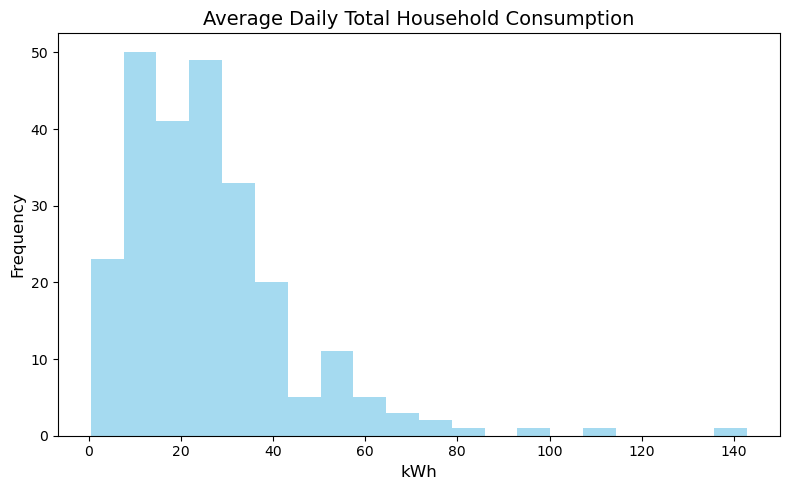

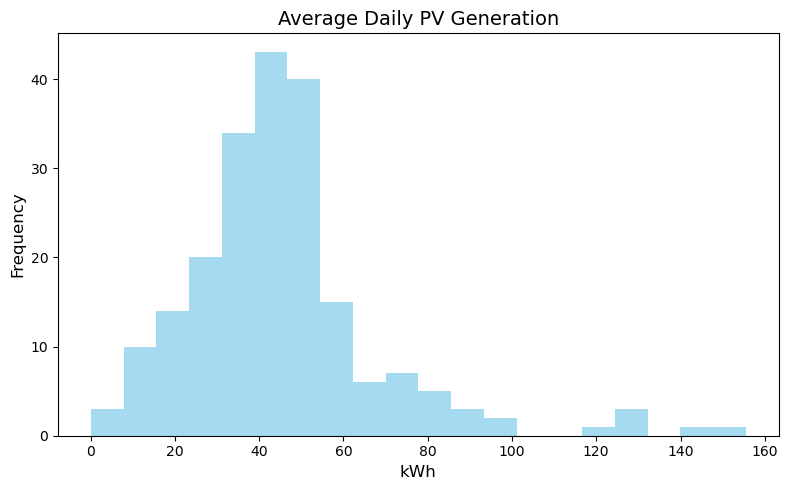

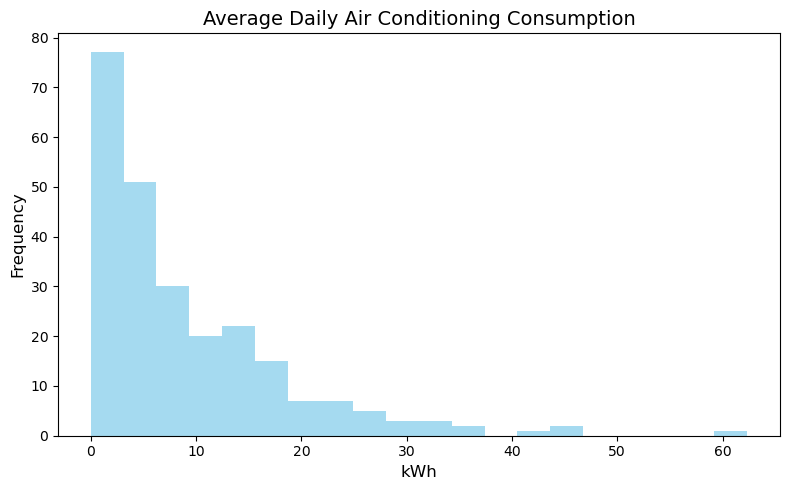

In [ ]:


# Function to create and save histograms using matplotlib
def create_histogram(data, title, xaxis_title, output_file, bins=20, width=8, height=5):
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(width, height))

    # Create the histogram
    ax.hist(data, bins=bins, color='skyblue', alpha=0.75)

    # Set chart title and labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xaxis_title, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Remove the gridlines
    ax.grid(False)

    # Save the figure to the output file
    plt.tight_layout()
    plt.savefig(output_file, format='png')

    # Show the plot (optional)
    plt.show()

# Sample usage - create and save each histogram
create_histogram(daily_consumption, 'Average Daily Total Household Consumption', 'kWh',
                 os.path.join(output_directory, 'household_consumption_histogram.png'))

create_histogram(daily_pv_generation, 'Average Daily PV Generation', 'kWh',
                 os.path.join(output_directory, 'pv_generation_histogram.png'))

create_histogram(daily_ac_consumption, 'Average Daily Air Conditioning Consumption', 'kWh',
                 os.path.join(output_directory, 'ac_consumption_histogram.png'))


In [ ]:
#plot


for site_id in site_ids:
    # Read the CSV file for the current site ID
    filepath = os.path.join(resampled_data_directory, f'{site_id}_profile.csv')
    df = pd.read_csv(filepath)

    # Create trace for PV generation
    #trace_pv = go.Scatter(x=df['TS'], y=df['PV'], mode='lines', name='PV Generation')

    # Create trace for load
    trace_load = go.Scatter(x=df['TS'], y=df['kWh'], mode='lines', name='Load')

    # Define layout
    layout = go.Layout(
        title=f'PV Generation and Load Over Time ({site_id})',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Energy (kWh)'),
        legend=dict(x=0.01, y=0.99),
        plot_bgcolor='rgba(0,0,0,0)'
    )

    # Create figure object combining PV generation and load traces
    fig = go.Figure(data=[trace_load], layout=layout)

    # Display the figure
    fig.show()

In [ ]:

# Create traces for PV generation and load
trace_pv = go.Scatter(x=stacked_df['TS'], y=stacked_df['PV'], mode='lines', name='PV Generation')
trace_load = go.Scatter(x=stacked_df['TS'], y=stacked_df['kWh'], mode='lines', name='Load')

# Define layout
layout = go.Layout(
    title=f'PV Generation and Load Full Profile ({site_id})',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (W)'),
    legend=dict(x=0.01, y=0.99),
    plot_bgcolor='rgba(0,0,0,0)'
)

# Create figure object
fig = go.Figure(data=[trace_pv, trace_load], layout=layout)

# Display plot
pyo.iplot(fig)

In [ ]:
## a better way to impute the data

site_id = 'W0192'

In [4]:

# Define the cleaned data directory (the directory with 200+ CSV files)
data_dir = os.path.join(base_directory, 'resampled_30min_data')

# Function to determine the season based on the date
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

# Function to determine if the day is a weekend or weekday
def get_weekday_or_weekend(date):
    # Weekdays are Monday (0) to Friday (4), weekends are Saturday (5) and Sunday (6)
    if date.weekday() >= 5:
        return 'WE'  # Weekend
    else:
        return 'WD'  # Weekday

# Loop through each file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        
        # Load the household CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the 'TS' column is in datetime format
        df['TS'] = pd.to_datetime(df['TS'])
        
        # Create the 'Season' column based on the month
        df['Season'] = df['TS'].dt.month.apply(get_season)
        
        # Create the 'Day_Type' column based on whether it's a weekday or weekend
        df['Day_Type'] = df['TS'].apply(get_weekday_or_weekend)
        
        # Save the updated DataFrame back to the file, or create a new file in another directory
        updated_file_path = os.path.join(data_dir, f"updated_{filename}")
        df.to_csv(updated_file_path, index=False)

        print(f"Updated {filename} with 'Season' and 'Day_Type' columns.")


Updated S0024_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0083_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0089_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0106_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0107_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0110_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0111_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0159_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0173_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0177_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0179_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0188_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0199_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0206_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0208_profile.csv with 'Season' and 'Day_Type' columns.
Updated S0209_profile.csv with 'Season' 